In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report ,r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale

In [4]:
df = pd.read_excel ("HW_Data_Set.xlsx", usecols = ['ind_37','ind_311','ind_239','ind_241','ind_18','ind_327','20_target'])
print (df)
#Alacağım değişkenleri random forest yaptıktan sonra, importance değerine bakarak seçtim. 

       ind_18      ind_37   ind_239     ind_241    ind_311    ind_327  \
0      9.1100  184.819232  0.000217   99.736250  97.980028  12.056738   
1      9.2225  191.985663  0.000217   99.668519  97.932319  11.971831   
2      9.3125  197.993551  0.000217   99.627319  97.910664  11.888112   
3      9.4150  200.370912  0.000217   99.567128  97.870334  11.805556   
4      9.8925  223.561880  0.000217   99.380024  97.705214  11.724138   
...       ...         ...       ...         ...        ...        ...   
6162  16.2175  102.453252  0.000013  100.965196  98.839946  14.583333   
6163  16.1175   96.780546  0.000013  100.960612  98.837255  14.285714   
6164  16.3125  108.218518  0.000013  100.885130  98.765154  14.000000   
6165  16.4200  124.933707  0.000013  100.783022  98.666984  13.725490   
6166  16.4500  123.289457  0.000013  100.824169  98.709061  13.461538   

      20_target  
0     15.135802  
1     15.143348  
2     15.146870  
3     15.153283  
4    -15.179065  
...         ...

# Gradient Boosting

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np

In [6]:
X = df.drop('20_target', 1)
y =df['20_target']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train) #default degerlerle model kurduk
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
y_pred=gbm_model.predict(X_test)#default degerlerden kurulan modelden tahmin edilen y lerimizi aldık

y_test

4316   -14.985767
4317   -14.957471
4318   -14.949925
4319   -14.948416
4320   -14.938606
          ...    
6162    14.673247
6163    14.673750
6164   -14.684566
6165   -14.699280
6166   -14.693117
Name: 20_target, Length: 1851, dtype: float64

In [17]:
y_pred

array([-3.72909721,  2.23837938,  3.42431758, ...,  8.73136125,
       14.88321935, 12.73719884])

In [19]:

np.sqrt(mean_squared_error(y_test,y_pred))

16.079543993644606

# Gradient Boosting Model Tuning


In [20]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.05],"n_estimators":[10,50,100],"max_depth":[3,5,10],"min_samples_split":[2,5,10]}


In [21]:
gbm=GradientBoostingRegressor()
gbm_cv=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=5)

In [22]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [23]:
print("En iyi parametreler: "+str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [27]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.01,max_depth=3,min_samples_split=5,n_estimators=100)


In [28]:
gbm_tuned=gbm_tuned.fit(X_train,y_train)

In [29]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

14.675792193734674

# Cat Boosting

In [9]:
from catboost import CatBoostRegressor


In [10]:
cat_model=CatBoostRegressor().fit(X_train,y_train) #default degerlerle model kurduk

Learning rate set to 0.050634
0:	learn: 14.9129045	total: 60ms	remaining: 60s
1:	learn: 14.8623148	total: 62.8ms	remaining: 31.3s
2:	learn: 14.8084665	total: 68.7ms	remaining: 22.8s
3:	learn: 14.7531079	total: 73.7ms	remaining: 18.3s
4:	learn: 14.7092548	total: 79.4ms	remaining: 15.8s
5:	learn: 14.6634843	total: 82.3ms	remaining: 13.6s
6:	learn: 14.6304563	total: 85.5ms	remaining: 12.1s
7:	learn: 14.5889656	total: 88.5ms	remaining: 11s
8:	learn: 14.5598560	total: 91.3ms	remaining: 10.1s
9:	learn: 14.5341460	total: 94.9ms	remaining: 9.39s
10:	learn: 14.4931356	total: 97.8ms	remaining: 8.79s
11:	learn: 14.4629811	total: 101ms	remaining: 8.3s
12:	learn: 14.4213454	total: 104ms	remaining: 7.88s
13:	learn: 14.3821564	total: 107ms	remaining: 7.51s
14:	learn: 14.3512929	total: 111ms	remaining: 7.29s
15:	learn: 14.3236427	total: 114ms	remaining: 6.99s
16:	learn: 14.2925848	total: 117ms	remaining: 6.75s
17:	learn: 14.2599059	total: 119ms	remaining: 6.51s
18:	learn: 14.2270483	total: 123ms	remai

189:	learn: 12.0501558	total: 1s	remaining: 4.27s
190:	learn: 12.0417167	total: 1.01s	remaining: 4.26s
191:	learn: 12.0285504	total: 1.01s	remaining: 4.25s
192:	learn: 12.0177063	total: 1.03s	remaining: 4.31s
193:	learn: 12.0076564	total: 1.04s	remaining: 4.33s
194:	learn: 11.9984459	total: 1.05s	remaining: 4.35s
195:	learn: 11.9900646	total: 1.06s	remaining: 4.37s
196:	learn: 11.9786904	total: 1.07s	remaining: 4.37s
197:	learn: 11.9713362	total: 1.08s	remaining: 4.38s
198:	learn: 11.9586421	total: 1.08s	remaining: 4.36s
199:	learn: 11.9498491	total: 1.09s	remaining: 4.34s
200:	learn: 11.9350436	total: 1.09s	remaining: 4.34s
201:	learn: 11.9216807	total: 1.09s	remaining: 4.32s
202:	learn: 11.9145953	total: 1.1s	remaining: 4.33s
203:	learn: 11.9057487	total: 1.11s	remaining: 4.32s
204:	learn: 11.8996721	total: 1.11s	remaining: 4.31s
205:	learn: 11.8870484	total: 1.12s	remaining: 4.32s
206:	learn: 11.8792902	total: 1.13s	remaining: 4.33s
207:	learn: 11.8654061	total: 1.13s	remaining: 4.3

367:	learn: 10.6006983	total: 2s	remaining: 3.44s
368:	learn: 10.5937016	total: 2.01s	remaining: 3.44s
369:	learn: 10.5894709	total: 2.02s	remaining: 3.44s
370:	learn: 10.5812993	total: 2.02s	remaining: 3.43s
371:	learn: 10.5746460	total: 2.03s	remaining: 3.43s
372:	learn: 10.5673611	total: 2.03s	remaining: 3.42s
373:	learn: 10.5601815	total: 2.04s	remaining: 3.42s
374:	learn: 10.5531026	total: 2.04s	remaining: 3.41s
375:	learn: 10.5457405	total: 2.05s	remaining: 3.4s
376:	learn: 10.5368990	total: 2.05s	remaining: 3.39s
377:	learn: 10.5247613	total: 2.06s	remaining: 3.38s
378:	learn: 10.5200669	total: 2.06s	remaining: 3.37s
379:	learn: 10.5117275	total: 2.06s	remaining: 3.37s
380:	learn: 10.5053794	total: 2.06s	remaining: 3.35s
381:	learn: 10.5002427	total: 2.07s	remaining: 3.35s
382:	learn: 10.4916255	total: 2.07s	remaining: 3.34s
383:	learn: 10.4861555	total: 2.08s	remaining: 3.33s
384:	learn: 10.4814882	total: 2.08s	remaining: 3.32s
385:	learn: 10.4768494	total: 2.08s	remaining: 3.3

569:	learn: 9.4983096	total: 2.79s	remaining: 2.1s
570:	learn: 9.4935408	total: 2.79s	remaining: 2.1s
571:	learn: 9.4874234	total: 2.79s	remaining: 2.09s
572:	learn: 9.4835780	total: 2.79s	remaining: 2.08s
573:	learn: 9.4769102	total: 2.8s	remaining: 2.08s
574:	learn: 9.4717935	total: 2.8s	remaining: 2.07s
575:	learn: 9.4654740	total: 2.81s	remaining: 2.06s
576:	learn: 9.4606736	total: 2.81s	remaining: 2.06s
577:	learn: 9.4568778	total: 2.81s	remaining: 2.05s
578:	learn: 9.4519774	total: 2.82s	remaining: 2.05s
579:	learn: 9.4472937	total: 2.82s	remaining: 2.04s
580:	learn: 9.4429499	total: 2.83s	remaining: 2.04s
581:	learn: 9.4372961	total: 2.83s	remaining: 2.03s
582:	learn: 9.4339832	total: 2.83s	remaining: 2.02s
583:	learn: 9.4317422	total: 2.83s	remaining: 2.02s
584:	learn: 9.4268215	total: 2.84s	remaining: 2.01s
585:	learn: 9.4222769	total: 2.84s	remaining: 2.01s
586:	learn: 9.4179840	total: 2.84s	remaining: 2s
587:	learn: 9.4155639	total: 2.85s	remaining: 1.99s
588:	learn: 9.40969

778:	learn: 8.6732246	total: 3.58s	remaining: 1.02s
779:	learn: 8.6695763	total: 3.59s	remaining: 1.01s
780:	learn: 8.6665636	total: 3.59s	remaining: 1.01s
781:	learn: 8.6640240	total: 3.59s	remaining: 1s
782:	learn: 8.6603922	total: 3.61s	remaining: 1s
783:	learn: 8.6583119	total: 3.61s	remaining: 996ms
784:	learn: 8.6563711	total: 3.62s	remaining: 991ms
785:	learn: 8.6532484	total: 3.62s	remaining: 986ms
786:	learn: 8.6506492	total: 3.62s	remaining: 981ms
787:	learn: 8.6462387	total: 3.63s	remaining: 976ms
788:	learn: 8.6424243	total: 3.63s	remaining: 971ms
789:	learn: 8.6409043	total: 3.63s	remaining: 966ms
790:	learn: 8.6354688	total: 3.65s	remaining: 963ms
791:	learn: 8.6343562	total: 3.65s	remaining: 959ms
792:	learn: 8.6328140	total: 3.65s	remaining: 954ms
793:	learn: 8.6300639	total: 3.66s	remaining: 949ms
794:	learn: 8.6266257	total: 3.66s	remaining: 945ms
795:	learn: 8.6213188	total: 3.67s	remaining: 941ms
796:	learn: 8.6164801	total: 3.67s	remaining: 936ms
797:	learn: 8.6103

966:	learn: 8.1024412	total: 4.36s	remaining: 149ms
967:	learn: 8.1012649	total: 4.37s	remaining: 145ms
968:	learn: 8.0993824	total: 4.38s	remaining: 140ms
969:	learn: 8.0966682	total: 4.38s	remaining: 136ms
970:	learn: 8.0909395	total: 4.38s	remaining: 131ms
971:	learn: 8.0894168	total: 4.39s	remaining: 126ms
972:	learn: 8.0872375	total: 4.39s	remaining: 122ms
973:	learn: 8.0856264	total: 4.4s	remaining: 117ms
974:	learn: 8.0829278	total: 4.4s	remaining: 113ms
975:	learn: 8.0801350	total: 4.4s	remaining: 108ms
976:	learn: 8.0770700	total: 4.41s	remaining: 104ms
977:	learn: 8.0728845	total: 4.41s	remaining: 99.2ms
978:	learn: 8.0698073	total: 4.41s	remaining: 94.7ms
979:	learn: 8.0662618	total: 4.42s	remaining: 90.1ms
980:	learn: 8.0637511	total: 4.42s	remaining: 85.6ms
981:	learn: 8.0594944	total: 4.42s	remaining: 81.1ms
982:	learn: 8.0582845	total: 4.43s	remaining: 76.6ms
983:	learn: 8.0561783	total: 4.43s	remaining: 72ms
984:	learn: 8.0524746	total: 4.43s	remaining: 67.5ms
985:	lear

In [11]:
y_pred=cat_model.predict(X_test)#default degerlerden kurulan modelden tahmin edilen y lerimizi aldık


In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

17.51159229987732

# Cat Boosting Modeltuning

In [37]:
catb_params = {
    'iterations':[200,500,1000,2000],
    
    'learning_rate': [0.01, 0.05, 0.1],
    'depth' : [3,4,5,6,8]
}

In [38]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2)

catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.1min
/home/basak/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 22.2min finished


0:	learn: 14.9584356	total: 1.98ms	remaining: 394ms
1:	learn: 14.9510956	total: 3.77ms	remaining: 373ms
2:	learn: 14.9451719	total: 5.45ms	remaining: 358ms
3:	learn: 14.9353223	total: 7.01ms	remaining: 344ms
4:	learn: 14.9260498	total: 8.64ms	remaining: 337ms
5:	learn: 14.9185331	total: 10.1ms	remaining: 326ms
6:	learn: 14.9098815	total: 11.6ms	remaining: 321ms
7:	learn: 14.9011680	total: 13.3ms	remaining: 319ms
8:	learn: 14.8946813	total: 14.8ms	remaining: 315ms
9:	learn: 14.8874777	total: 16.4ms	remaining: 312ms
10:	learn: 14.8821308	total: 18.1ms	remaining: 311ms
11:	learn: 14.8727568	total: 19.9ms	remaining: 311ms
12:	learn: 14.8650433	total: 21.3ms	remaining: 307ms
13:	learn: 14.8584848	total: 22.9ms	remaining: 304ms
14:	learn: 14.8495840	total: 24.5ms	remaining: 303ms
15:	learn: 14.8402788	total: 26.3ms	remaining: 302ms
16:	learn: 14.8328298	total: 27.8ms	remaining: 300ms
17:	learn: 14.8269376	total: 29.5ms	remaining: 298ms
18:	learn: 14.8201129	total: 31ms	remaining: 295ms
19:	l

{'depth': 5, 'iterations': 200, 'learning_rate': 0.01}

In [21]:
catb=CatBoostRegressor(learning_rate=0.01,
                               depth=5,iterations= 200)

In [22]:
catb_tuned=catb.fit(X_train,y_train)

0:	learn: 14.9584356	total: 59.3ms	remaining: 11.8s
1:	learn: 14.9510956	total: 64.2ms	remaining: 6.36s
2:	learn: 14.9451719	total: 68.6ms	remaining: 4.5s
3:	learn: 14.9353223	total: 73.1ms	remaining: 3.58s
4:	learn: 14.9260498	total: 77.7ms	remaining: 3.03s
5:	learn: 14.9185331	total: 83.6ms	remaining: 2.7s
6:	learn: 14.9098815	total: 88.4ms	remaining: 2.44s
7:	learn: 14.9011680	total: 93.5ms	remaining: 2.24s
8:	learn: 14.8946813	total: 98.4ms	remaining: 2.09s
9:	learn: 14.8874777	total: 104ms	remaining: 1.97s
10:	learn: 14.8821308	total: 108ms	remaining: 1.86s
11:	learn: 14.8727568	total: 113ms	remaining: 1.77s
12:	learn: 14.8650433	total: 118ms	remaining: 1.7s
13:	learn: 14.8584848	total: 123ms	remaining: 1.63s
14:	learn: 14.8495840	total: 126ms	remaining: 1.55s
15:	learn: 14.8402788	total: 131ms	remaining: 1.5s
16:	learn: 14.8328298	total: 135ms	remaining: 1.45s
17:	learn: 14.8269376	total: 137ms	remaining: 1.39s
18:	learn: 14.8201129	total: 139ms	remaining: 1.33s
19:	learn: 14.813

In [49]:
y_pred=catb_tuned.predict(X_test)#default degerlerden kurulan modelden tahmin edilen y lerimizi aldık


In [50]:
np.sqrt(mean_squared_error(y_test,y_pred))

14.58338069019181

# SVR

In [13]:

from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [14]:
svr= SVR('linear').fit(X_train, y_train)


In [15]:
y_pred=svr.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

15.638351874454395

# SVR TUNED

In [ ]:
svr_params =  {'C': [0.01,5,10,20]}
svr_cv_model_linear = GridSearchCV(svr,svr_params, cv=10)

In [16]:
svr_cv_model_linear.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.01, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print("En iyi parametreler: "+str(svr_cv_model_linear.best_params_))

En iyi parametreler: {'C': 0.01}


In [6]:
svr_t=SVR(kernel='linear', C=0.01)

In [14]:
svr_tuned=svr_t.fit(X_train,y_train)

In [15]:
y_pred=svr_tuned.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

15.678352004166275

# KNN

In [17]:
knn = KNeighborsRegressor()

In [18]:
knn_model = knn.fit(X_train, y_train)

In [19]:
knn_model


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [38]:
y_pred = knn_model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

16.45276643702801

# KNN Regressor Tuning

In [ ]:
#knn_params = {"n_neighbors": np.arange(2,15),
#              "leaf_size": [30,40,50,100],
#              "algorithm": ["ball_tree", "kd_tree", "brute"],
#              "metric": ["euclidean", "minkowski", "manhattan"],
#              "weights": ["uniform", "distance"]}

In [41]:
knn_model_tuned = KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='distance')

In [45]:
knn_tuned =knn_model_tuned.fit(X_train,y_train)

In [46]:
y_pred_tuned =  knn_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

17.00327031671334

# RESULTS BEFORE  THE Tuning


In [21]:
modeller = [
    cat_model,
    gbm_model,
    svr,
    knn_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("mean_squared_error:", dogruluk)

----------------------------
CatBoostRegressor:
mean_squared_error: 17.51159229987732
----------------------------
GradientBoostingRegressor:
mean_squared_error: 16.081308007030636
----------------------------
SVR:
mean_squared_error: 15.638351874454395
----------------------------
KNeighborsRegressor:
mean_squared_error: 16.45276643702801


# RESULTS AFTER THE Tuning


In [50]:
modeller = [
    catb_tuned,
    gbm_tuned,
    svr_tuned,
    knn_tuned
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("mean_squared_error:", dogruluk)

----------------------------
CatBoostRegressor:
mean_squared_error: 14.58338069019181
----------------------------
GradientBoostingRegressor:
mean_squared_error: 14.675792193734674
----------------------------
SVR:
mean_squared_error: 15.678352004166275
----------------------------
KNeighborsRegressor:
mean_squared_error: 17.00327031671334


# POZITIF, NEGATIF, NOTR yaparak Gaussian Naive Bayes

In [83]:
import numpy as np 
import pandas as pd 


df = pd.read_excel('HW_Data_Set.xlsx', index_col=None)

In [84]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [85]:


obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()



,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [86]:
obj_df[obj_df.isnull().any(axis=1)]

,ind_109,ind_420,ind_422


In [87]:
df=df.dropna()

In [88]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())

ind_109 :  2
ind_420 :  582
ind_422 :  573


In [89]:


df = df.drop(["ind_420", "ind_422"], axis=1)
df.head()



,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["ind_109"])
df["ind_109"] = le.fit_transform(df["ind_109"])

np.unique(df["ind_109"])

array([0, 1])

In [91]:
dummy = pd.get_dummies(df["ind_109"])
data_dummy = pd.concat([df, dummy],axis=1)
data_dummy = data_dummy.drop(["ind_109"], axis=1)
data_dummy.head()
df = data_dummy


In [92]:
df["90_target"].describe().T


count    6167.000000
mean       -3.315072
std        36.841541
min       -38.573858
25%       -37.695273
50%       -35.788391
75%        37.521892
max        38.465649
Name: 90_target, dtype: float64

In [93]:
df.insert(3,"NewTarget_90",df["90_target"])
for i in df["NewTarget_90"]:
    if i<0:
        df["NewTarget_90"]=df["NewTarget_90"].replace(i,"< 0 olanlar")
    elif (i>=0) and (i<1):
        df["NewTarget_90"]=df["NewTarget_90"].replace(i,"0-1 arasinda olanlar")
    elif (i>=1):
        df["NewTarget_90"]=df["NewTarget_90"].replace(i,"1 =< olanlar")

In [95]:
df["NewTarget_90"].value_counts()

< 0 olanlar             3318
1 =< olanlar            2773
0-1 arasinda olanlar      76
Name: NewTarget_90, dtype: int64

In [97]:
lbe = LabelEncoder()

df["NewTarget_90"] = lbe.fit_transform(df["NewTarget_90"])

In [98]:
df.head(2)

,ind_5,ind_6,ind_8,NewTarget_90,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,0,1
0,19,17,100.0,1,85.714286,14.285714,72.363515,60.808814,23.80,17.62,...,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.0,1,78.571429,21.428571,74.275883,64.366798,11.45,18.16,...,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,1,0


In [100]:
df["NewTarget_90"].value_counts()

2    3318
1    2773
0      76
Name: NewTarget_90, dtype: int64

In [102]:
df.drop(["20_target","50_target","90_target"],axis=1,inplace=True)

In [103]:
X = df.drop(["NewTarget_90"],axis=1) 
y = df["NewTarget_90"]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42,shuffle = False)

# Gaussian Naive Bayes

In [105]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
nb_model.predict(X_test)[0:5]

array([2, 2, 2, 2, 2])

In [107]:
nb_model.predict_proba(X_test)[0:5]

array([[0.00000000e+00, 1.59518328e-06, 9.99998405e-01],
       [0.00000000e+00, 1.46564072e-06, 9.99998534e-01],
       [0.00000000e+00, 1.10715003e-06, 9.99998893e-01],
       [0.00000000e+00, 1.16679035e-06, 9.99998833e-01],
       [0.00000000e+00, 1.04539076e-06, 9.99998955e-01]])

In [108]:


y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)



0.5097244732576985

In [109]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.48465119328612644

# CLUSTER

In [22]:
df = pd.read_excel('HW_Data_Set.xlsx', index_col=None)

In [23]:
df1 = df.copy()

df1.loc[df1[df1["ind_420"] == "?"].index] = np.nan 

#Object tipindeki değişkenlerde nan değerlerin doldurulması

df1["ind_422"] = df1["ind_422"].fillna(df1.mean()["ind_422"])
df1["ind_420"] = df1["ind_420"].fillna(df1.mean()["ind_420"])

df1["ind_422"] = df1["ind_422"].astype('int32')
df1["ind_420"] = df1["ind_420"].astype('int32')

# Geriye kalan NaN degiskenleri doldurulmakta

column = list(df1.select_dtypes(include=["int32","float64"]))
df1[column] = df1[column].apply(lambda x: x.fillna(x.mean()),axis=0)

# Kalan son object tipindeki degiskeni de 1-0 haline getirildi.

df1 = pd.get_dummies(df1,columns= ["ind_109"], prefix= ["ind_109"])

df1 = df1.drop(["ind_109_RED"],axis=1)

df_X = df1.drop(labels="ind_109_GREEN",axis=1)

In [24]:
df_X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [25]:
# Burada elimine islemi yapmak icin ortalmalari -1 ve 1 den buyuk olan degiskenler öncelik olarak alındı

col = list(df_X)
bos = []


for i in col:
    
    if df_X[i].mean() < -1 or df_X[i].mean() > 1:
        bos.append(i)

len(bos)

65

In [26]:
DF = df_X.loc[:,bos]

DF

,ind_5,ind_6,ind_8,ind_9,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,...,ind_387,ind_392,ind_406,ind_414,ind_416,ind_418,ind_420,ind_422,50_target,90_target
0,19.0,17.0,100.000000,85.714286,72.363515,60.808814,23.80,17.62,11.73,12.060000,...,-3.731343,-32.587430,-44.0,2.0,-49.6,-54.0,-152,-353,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,74.275883,64.366798,11.45,18.16,12.22,11.326667,...,-1.369863,-38.115965,-48.0,0.8,-55.6,-60.0,-158,-359,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,75.140402,65.915803,8.75,17.86,12.28,10.973333,...,-4.278922,-40.428126,-48.0,2.7,-58.4,-60.0,-160,-362,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,76.677846,68.584234,7.80,14.76,12.61,10.426667,...,-1.355422,-45.019355,-51.0,0.9,-61.8,-65.0,-166,-367,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,81.603007,76.455495,14.90,11.92,14.25,11.406667,...,-0.116144,-54.849177,-70.0,0.1,-79.8,-86.0,-186,-388,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27.0,31.0,57.142857,28.571429,60.010531,32.362582,9.70,9.38,13.66,15.100000,...,-26.775956,-17.777370,-25.0,14.7,-28.2,-40.0,-11,-270,-34.536532,-35.867088
6163,22.0,27.0,50.000000,21.428571,60.209998,32.914628,7.65,8.84,11.79,14.753333,...,-26.047359,-17.714547,-23.0,14.3,-28.6,-41.0,-12,-271,-34.537716,-35.868318
6164,19.0,22.0,42.857143,14.285714,64.329611,43.550592,8.95,9.06,10.30,14.613333,...,-10.382514,-25.781189,-30.0,5.7,-37.2,-49.0,-21,-280,-34.563173,-35.894755
6165,19.0,19.0,100.000000,7.142857,69.027764,54.130755,13.55,10.36,10.55,13.606667,...,-2.247191,-37.007014,-40.0,1.4,-48.9,-61.0,-33,-292,-34.597806,-35.930723


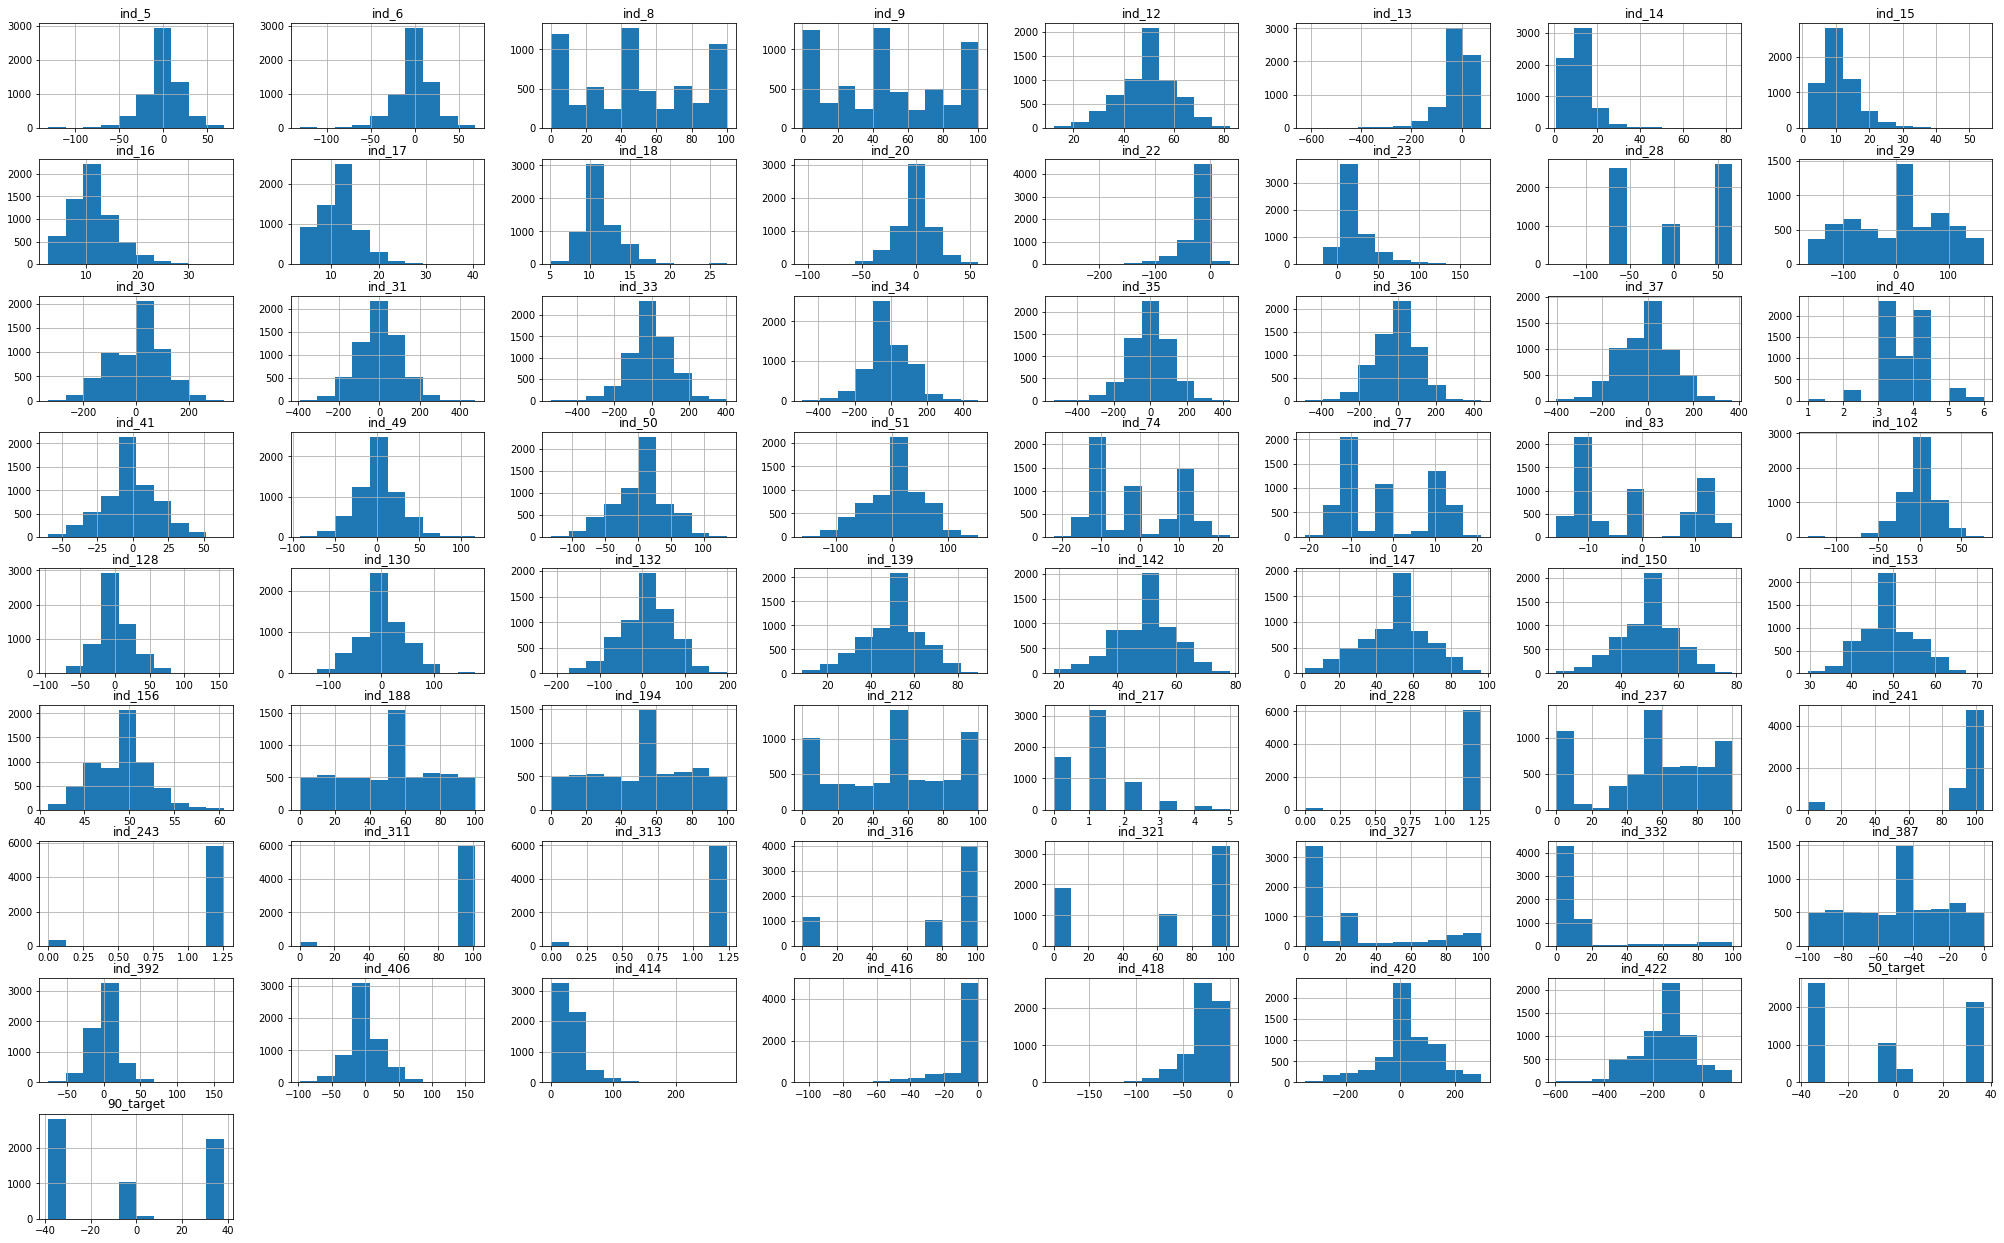

In [27]:
# seçilen degiskenlerin histogramlarindan yogunlugun nerelerde oldugunu iki baslilik sergileyenlerin hangileri oldugunu inceliyorum
DF.hist(figsize = (35,22));

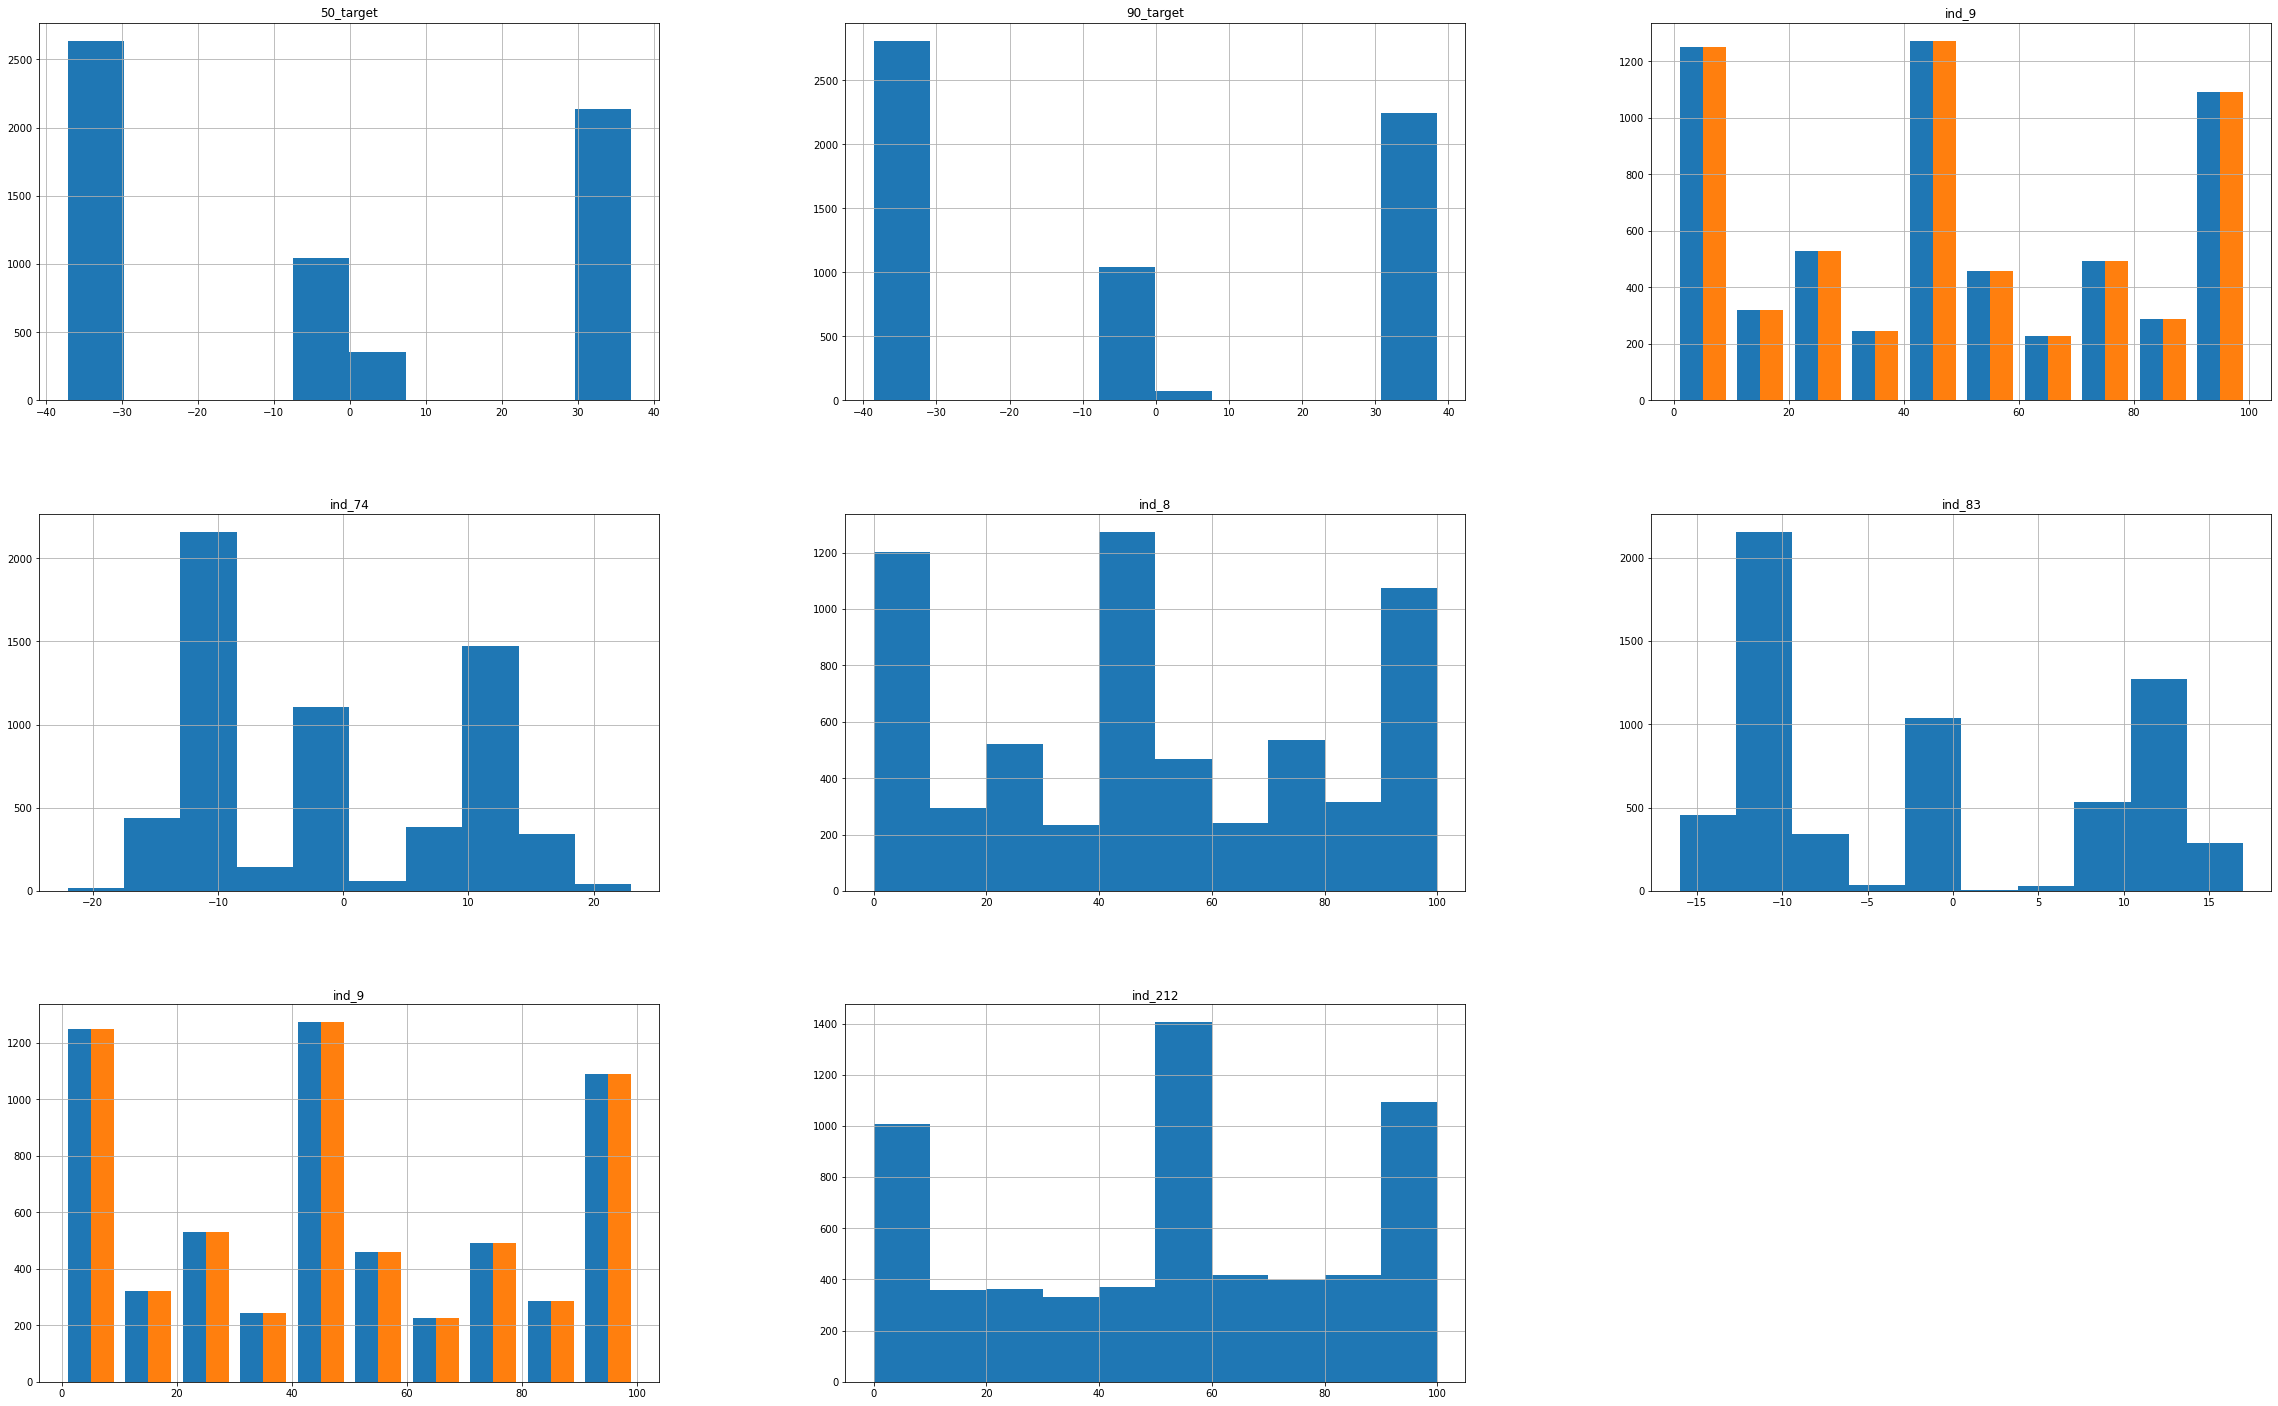

In [28]:
#  Bu degiskenlerin arasindan en belirgin gruplasma olabilecegini dusundugum 8 tanesini sectim

cols = ["50_target","90_target","ind_9","ind_74","ind_8","ind_83","ind_9","ind_212"]


DF.loc[:,cols].hist(figsize = (40,25));

In [29]:
DF1 = DF.loc[:,cols]
DF1.shape

(6167, 8)

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
k_fit = kmeans.fit(DF1)

In [32]:
k_fit.cluster_centers_

array([[-3.30381315e+01, -3.63825542e+01,  8.64298379e+01,
        -5.94237589e+00,  2.83814590e+01, -3.60904255e+00,
         8.64298379e+01,  3.18964277e+01],
       [ 3.38290951e+01,  3.71538427e+01,  1.95292473e+01,
         4.74551387e+00,  6.51771149e+01,  2.29526917e+00,
         1.95292473e+01,  6.21178327e+01],
       [-2.08573041e+01, -2.40985344e+01,  3.21049018e+01,
        -6.35642853e-02,  5.79736497e+01, -1.53208043e+00,
         3.21049018e+01,  6.04618670e+01],
       [ 3.15511923e+01,  3.65628270e+01,  8.34008946e+01,
        -5.37964775e+00,  2.79424098e+01, -5.21722114e+00,
         8.34008946e+01,  3.66106454e+01]])

In [33]:
kumeler = k_fit.labels_
kumeler

array([3, 3, 2, ..., 2, 2, 2], dtype=int32)

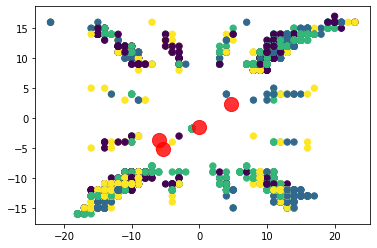

In [34]:
# 4 farklı değişkenin nasıl kümelendiği görülmekte.


plt.scatter(DF1.iloc[:,3], DF1.iloc[:,5], c = kumeler, s = 40, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,3], merkezler[:,5], c = "red", s = 200, alpha = 0.8);

In [35]:
# Burada optimum kume sayisi icin 6 seçip yeni bir dataframe oluşturdum.

kmeans = KMeans(n_clusters = 6)
k_fit = kmeans.fit(DF1)
kumeler = k_fit.labels_

yeni = pd.DataFrame({"ID" : DF1.index, "Kumeler": kumeler})

yeni["Kumeler"].value_counts()


0    1507
3    1223
1     987
4     983
2     838
5     629
Name: Kumeler, dtype: int64

In [36]:


DF1["Kumeler"] = yeni["Kumeler"]



In [37]:
DF1.head(5)

,50_target,90_target,ind_9,ind_74,ind_8,ind_83,ind_9,ind_212,Kumeler
0,35.625252,36.997753,85.714286,8.0,100.0,8.0,85.714286,72.470277,1
1,35.643013,37.016198,78.571429,8.0,100.0,8.0,78.571429,79.199436,1
2,35.651301,-37.024805,71.428571,8.0,100.0,8.0,71.428571,82.241467,0
3,0.000000,-37.040483,64.285714,8.0,100.0,8.0,64.285714,100.000000,2
4,-35.727079,-37.103503,57.142857,8.0,100.0,8.0,57.142857,100.000000,2
